In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/sample_submission.csv
/kaggle/input/train.csv
/kaggle/input/test.csv


### Fetch the data

In [2]:
train = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")

In [3]:
print("train data : ", train.shape)
print("test data : ",  test.shape)


train data :  (42000, 785)
test data :  (28000, 784)


#### Train_Test split using Stratified sampling

In [4]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42) 
for train_index, test_index in split.split(train, train["label"]):
        strat_train_set = train.loc[train_index]
        strat_test_set = train.loc[test_index]

#### Convert 784 columns into 28 * 28 pixcel size

In [5]:
train_images = strat_train_set.drop(['label'],axis=1 ).values.reshape(strat_train_set.shape[0],28,28)
train_labels = strat_train_set['label'].values

test_images = strat_test_set.drop(['label'],axis=1 ).values.reshape(strat_test_set.shape[0],28,28)
test_labels = strat_test_set['label'].values

**Visualize one of the train images**

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  38 105 105 149 149 155 204  17
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 112 224 252 252   0   0   3  23   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  49 164 210 199  92  88   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  57 158 252 252 139  31   0   0   0 

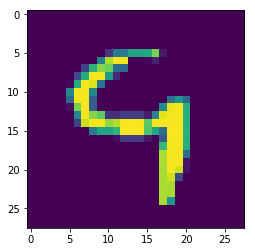

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(train_images[10])
print(train_labels[10])
print(train_images[10])

**Visualize one of the test images**

1
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 233 254 213
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 152 252 253 252
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 152 253 254 253
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 193 

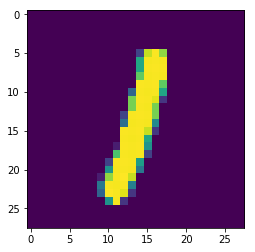

In [7]:
plt.imshow(test_images[0])
print(test_labels[0])
print(test_images[0])

#### Keras CNN model

In [8]:
import tensorflow as tf
from keras.utils import to_categorical

/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [9]:
DESIRED_ACCURACY = 0.985

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_acc')>DESIRED_ACCURACY):
            print("\nReached 99.9% accuracy so cancelling training!")
            self.model.stop_training = True

callbacks = myCallback()

In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(625, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [11]:
from tensorflow.keras.optimizers import RMSprop

train_images = train_images.reshape((strat_train_set.shape[0], 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((strat_test_set.shape[0], 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

model.compile(optimizer= RMSprop(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=30, validation_data=(test_images, test_labels), verbose=1, batch_size=64, callbacks=[callbacks])

Train on 33600 samples, validate on 8400 samples
Epoch 1/30
33600/33600 [==============================] - 6s 193us/sample - loss: 0.3287 - acc: 0.8953 - val_loss: 0.1231 - val_acc: 0.9611
Epoch 2/30
33600/33600 [==============================] - 3s 95us/sample - loss: 0.0934 - acc: 0.9705 - val_loss: 0.0803 - val_acc: 0.9736
Epoch 3/30
33600/33600 [==============================] - 3s 94us/sample - loss: 0.0593 - acc: 0.9816 - val_loss: 0.0752 - val_acc: 0.9795
Epoch 4/30
33600/33600 [==============================] - 3s 94us/sample - loss: 0.0435 - acc: 0.9862 - val_loss: 0.0641 - val_acc: 0.9810
Epoch 5/30
33600/33600 [==============================] - 3s 96us/sample - loss: 0.0345 - acc: 0.9892 - val_loss: 0.0681 - val_acc: 0.9807
Epoch 6/30
33024/33600 [============================>.] - ETA: 0s - loss: 0.0270 - acc: 0.9917
Reached 99.9% accuracy so cancelling training!
33600/33600 [==============================] - 3s 95us/sample - loss: 0.0274 - acc: 0.9916 - val_loss: 0.0510 - v

**training history**

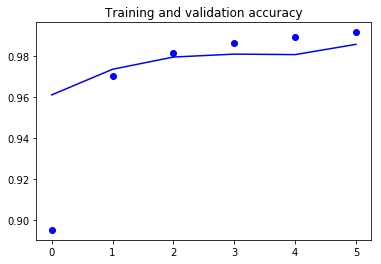

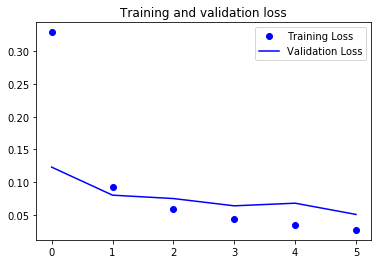

In [12]:

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#### Prepare submition file

In [13]:
predictions = model.predict(test.values.reshape((28000, 28, 28, 1)))
results = np.argmax(predictions,axis = 1)
pd.DataFrame({"ImageId":list(range(1,len(results)+1)),"Label":results}).to_csv( "mnist_keras_cnn_lenet.csv",index=False,header=True)